In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import shap
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
df = pd.read_csv('dat.csv')

In [29]:
df.describe()

,SM1,SM2,SM3,SM4,SM5,SEO1,SEO2,SEO3,SEO4,SEO5,...,OA2,OA3,OA4,OA5,BD1,BD2,BD3,BD4,BD5,BD6
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,4.180328,4.008197,3.106557,3.139344,3.163934,3.647541,3.909836,3.663934,4.147541,3.803279,...,3.319672,3.467213,3.459016,3.450820,4.114754,4.114754,3.049180,3.696721,4.090164,3.147541
std,1.020585,1.024460,1.104516,1.123127,1.031413,1.184766,0.936003,1.025386,1.001422,1.088173,...,1.100461,1.114773,1.045633,1.114165,0.946474,0.928846,1.218673,0.969701,0.979155,1.237647
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.250000,3.000000,3.250000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,4.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [30]:
corr_matrix = df.corr()

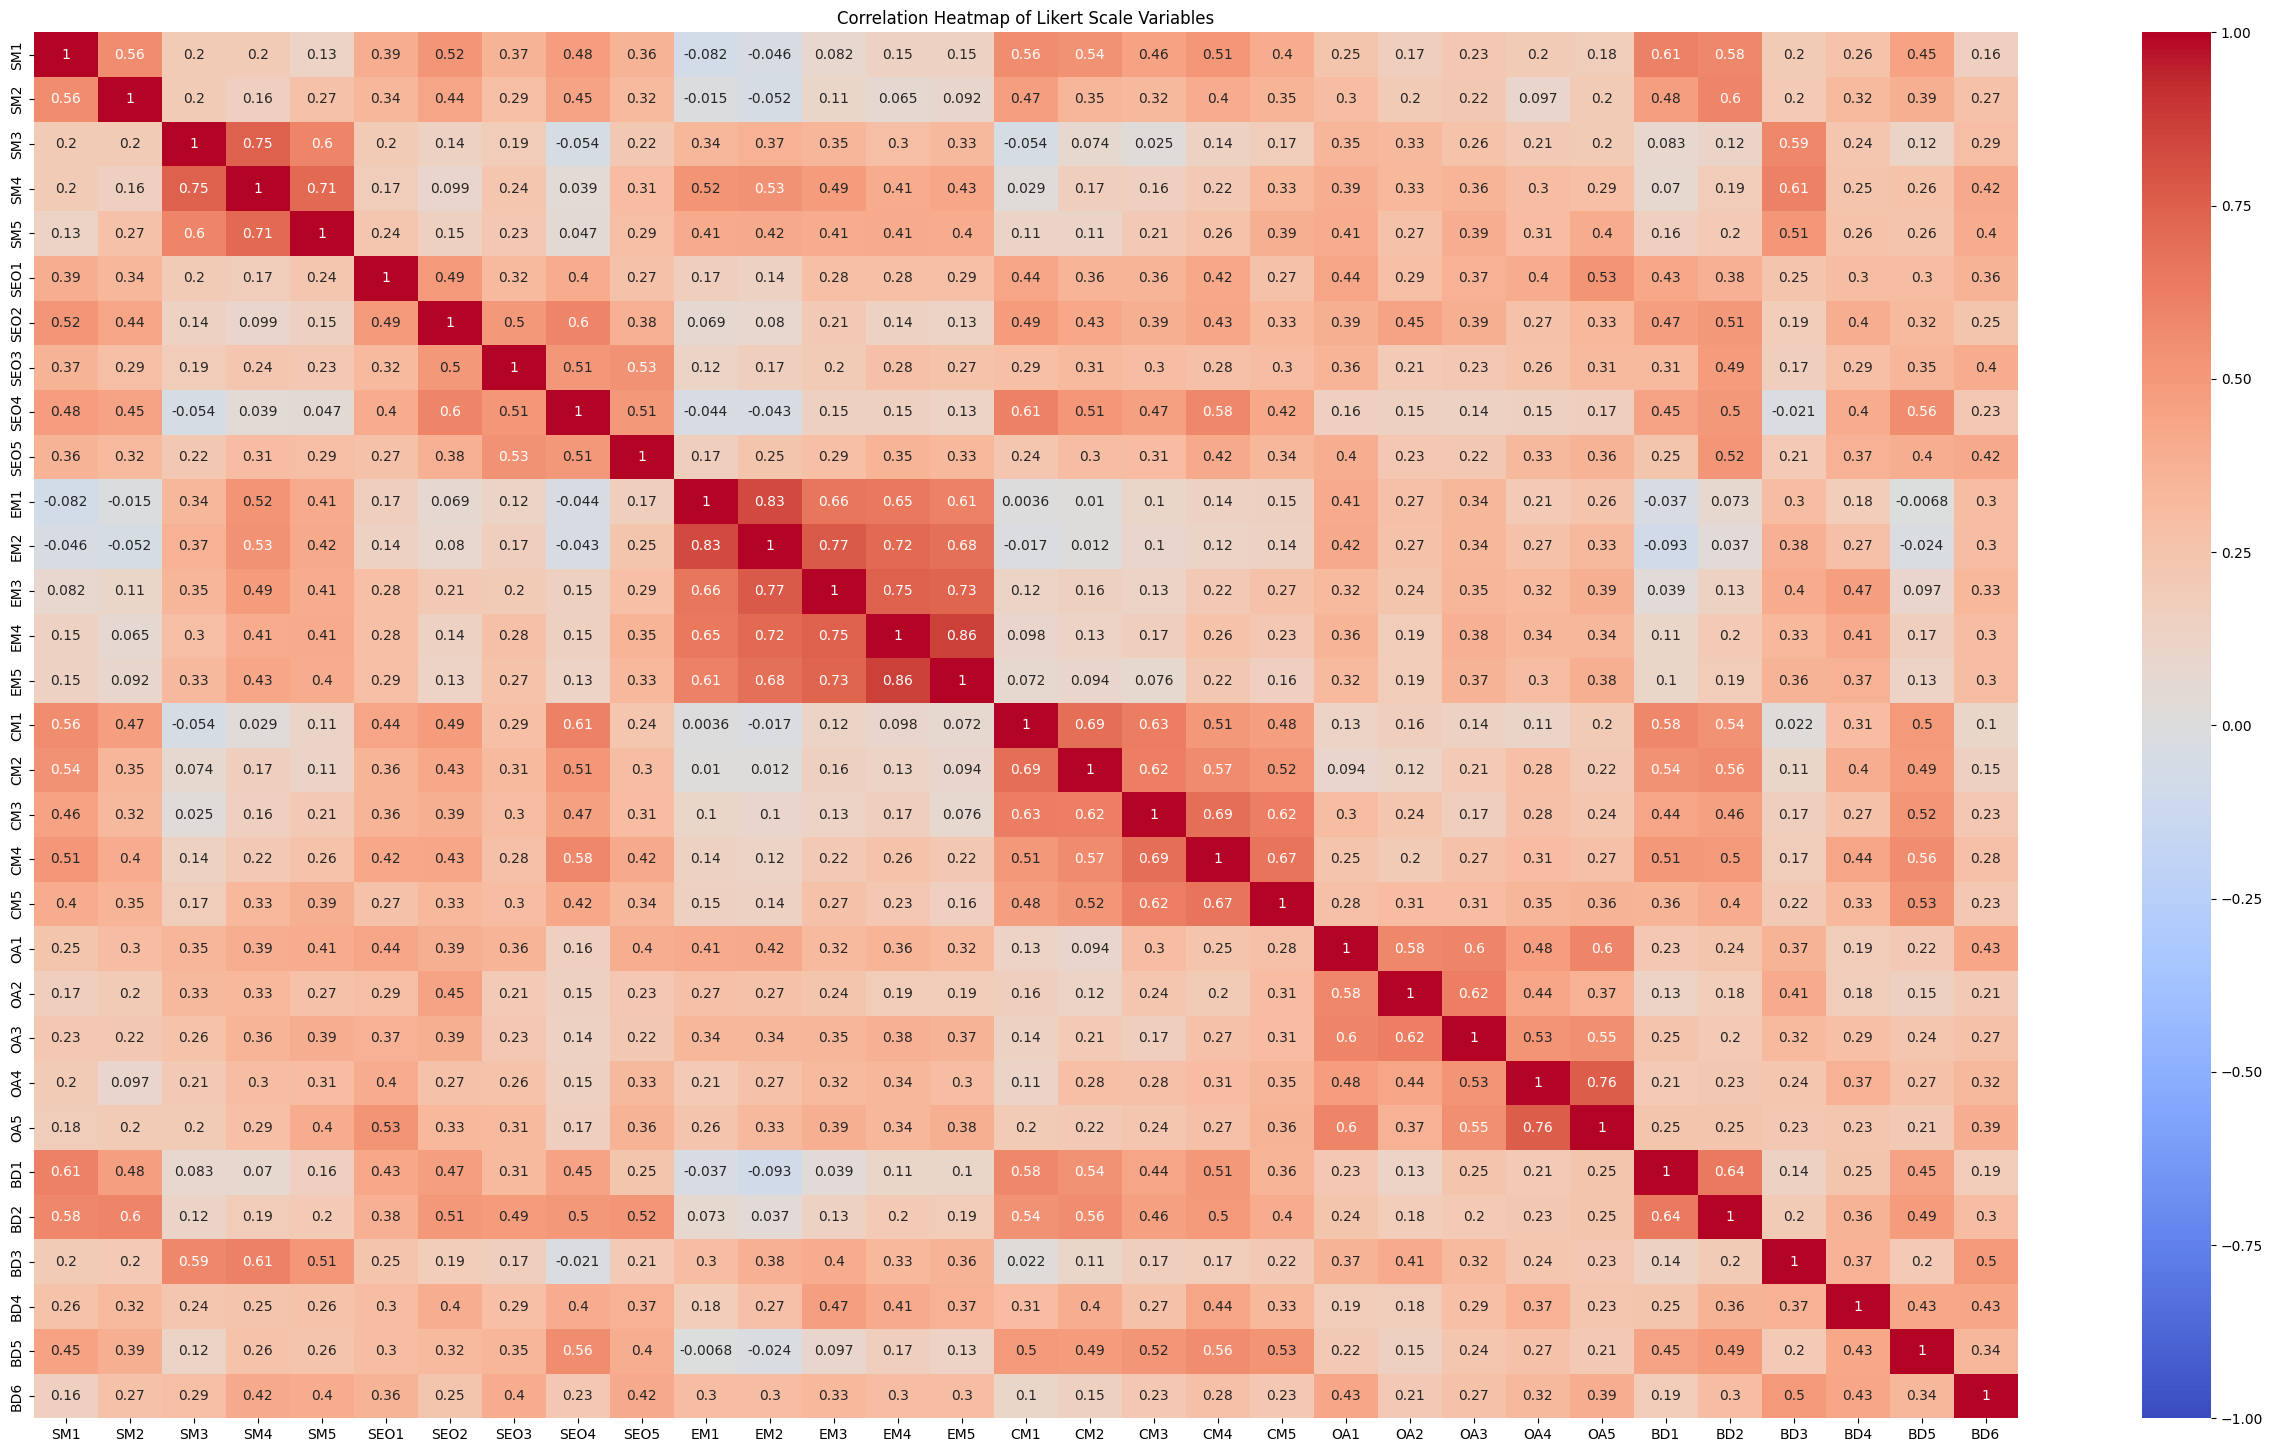

In [20]:
# plt.figure(figsize=(32, 18))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap of Likert Scale Variables')
# plt.show()

In [31]:
X = df.iloc[:, :30]
y = df.iloc[:, 30:]

In [32]:
 X.columns
y.columns

Index(['BD6'], dtype='object')

In [33]:
missing_x = X.isna().sum()
missing_y = y.isna().sum()
print(missing_x)
print(missing_y)

SM1     0
SM2     0
SM3     0
SM4     0
SM5     0
SEO1    0
SEO2    0
SEO3    0
SEO4    0
SEO5    0
EM1     0
EM2     0
EM3     0
EM4     0
EM5     0
CM1     0
CM2     0
CM3     0
CM4     0
CM5     0
OA1     0
OA2     0
OA3     0
OA4     0
OA5     0
BD1     0
BD2     0
BD3     0
BD4     0
BD5     0
dtype: int64
BD6    0
dtype: int64


In [34]:
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R² score
y_pred = model.predict(X)
r2 = model.score(X, y)  # Or use: r2_score(y, y_pred)

# Print results
print(f"R² Score: {r2:.4f}")
# print(f"Coefficient(s): {model.coef_}")
# print(f"Intercept: {model.intercept_}")

R² Score: 0.5459


R² Score: 0.5459
Mean Squared Error (MSE): 0.6899
Root Mean Squared Error (RMSE): 0.8306
Mean Absolute Error (MAE): 0.6371

Top 5 Features by Absolute Coefficient:
   Feature  Coefficient  Abs_Coefficient
27     BD3     0.413670         0.413670
28     BD4     0.331332         0.331332
24     OA5     0.300526         0.300526
10     EM1     0.291632         0.291632
7     SEO3     0.286508         0.286508


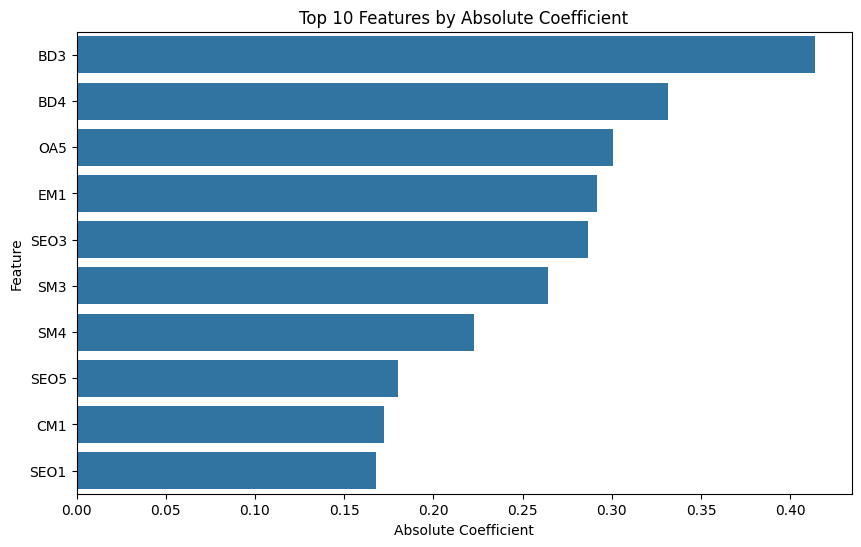

In [35]:
if y.shape[1] > 1:
    print(f"Warning: y has {y.shape[1]} columns. Using the first column as target.")
    y = y.iloc[:, 0]  # Select first column of y
else:
    y = y.iloc[:, 0]  # Flatten to 1D Series

# Step 3: Check X for non-1D columns
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, (list, np.ndarray))).any():
        print(f"Error: Column {col} contains non-scalar values (e.g., lists/arrays).")
        # Attempt to convert lists/arrays to scalars (e.g., take first element or mean)
        X[col] = X[col].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)

# Ensure X and y are numerical
X = X.astype(float)  # Convert to float to ensure numerical data
y = y.astype(float)

# Step 4: Optional scaling (recommended for feature importance comparison)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Retain column names

# Step 5: Fit linear regression
model = LinearRegression()
model.fit(X_scaled, y)

# Predict and calculate metrics
y_pred = model.predict(X_scaled)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 6: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Print top 5 features
print("\nTop 5 Features by Absolute Coefficient:")
print(feature_importance[['Feature', 'Coefficient', 'Abs_Coefficient']].head())

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features by Absolute Coefficient')
plt.xlabel('Absolute Coefficient')
plt.show()
